# GRADTDA5622 - Big Data Computing Foundations 2
## Homework 1: CRISP-DM Business Understanding
- Semester: Spring 2022
- Instructor: Tom Bihari
- Section: N/A
- Student Name: Able Baker **(fill in)**
- Student Email: baker.12345@osu.edu **(fill in)**
- Student ID: 123456789 **(fill in)**

Based on CRISP-DM Template Version V1.
***

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
- **(I will fill this in for each assignment - Tom Bihari)**
***

**The Objectives of This Assignment are:**
1. To gain experience in performing the Business Understanding step of the CRISP-DM methodology.

**Instructions:**
- **Read** the Business Problem.
- **Fill in** the **Business Understanding** section.
- **Fill in** the **Conclusions** section.
- **Ignore the other sections**.  We will address them later.  (I filled some of these sections with code you can **play with if you like**.)

**Business Problem:**

You are the Director of Data Science for Top Dog Athletics, Inc.  TDAI is an online clothing store that sells the following products:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

The Vice President of Production has asked your team to develop an image recognition system that can be put into production.  The system will classify an image of a product traveling down a conveyor belt in the shipping facility, and ensure it is the correct type for the customer's order.  TDAI ships an average of **1000 products per day**.  The cost of correctly or incorrectly classifying a product, based on its image, is as follows:

- **Correct classifications** produce a **$5 profit**.

- **Mis-classifications** produce a **$10 loss** (due to customer returns).

**Example Image:**

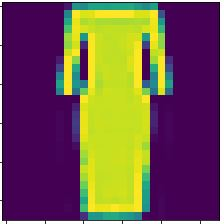

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

In [14]:
# Create a dictinary of label names, for future use.
label_names = {0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}

In [15]:
# Show an image taken from a record in the data.
import matplotlib.pyplot as plt
def show_image(caption,pixels):
    print(caption)
    image = np.asarray(pixels).reshape((28,28))
    # See, for other colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html
    # plt.imshow(image, cmap='gray', vmin = 0, vmax = 255, interpolation='none') #with grayscale colormap
    plt.imshow(image) #with default colormap (viridis)
    plt.show()

***
# Section: 1 - Business Understanding
- Consider the following questions and discuss the possible answers to them in the spaces below.
- It is OK to say that you do not know.  How might you get answers to the questions?
- You may consider some of the questions to be "not applicable".  If so, why?
- You may choose to use markdown instead of raw text in the answer cells, to make them "pretty" and easy to read.
***

**Context**
- What is the overview, history, big picture?

**Business Objectives**
- What is the problem or opportunity to be addressed / solved?
- What is its business value?

**Stakeholders**
- Who are they?
- What are their needs?

**General Goals**
- Understand the past/current state (descriptive)?
- Predict the future (predictive)?
- Mine for unknown patterns / insights?
- Answer questions?  What are they?
- Support decisions?  What are they?

**Scope**
- What is the specific scope of the project?
- What, specifically, is NOT in scope?  (What are you not doing that someone might think you are doing?)
Is the scope flexible?  In what way?

**Deliverables**
- Report?
- Reusable code?
- Presentation?

**Success Criteria**
- What, specifically, must be accomplished for this project to be a success?

**Solution Approach**
- Is this a “one time” (throw away) solution?
- Or will the solution become part of repeated process that is used and enhanced over time?

**Quality**
- What level of Correctness or Confidence is needed?
- Is this life-critical or are we looking for ‘directionally correct’ results?

**Constraints**
- Are there legal / regulatory implications (privacy, security, liability, HIPAA, FERPA)?
- Are there architectural constraints?

**Time / Cost**
- What is the deadline or budget?

**Dependencies**
- Is this project dependent on any other project or activity?
- Is any other project or activity dependent on this project?

**Resources Needed**
- Do you potentially need access to specific people, data, etc?

**Other Considerations**
- What other considerations, not covered above, might be relevant?

***
# Section: 2 - Data Understanding
***

In [16]:
# The documentation of the dataset is here: https://www.kaggle.com/zalando-research/fashionmnist
# Normally, we might do Exploratory Data Analysis here.
# For now, assume the data is well understood and perfect.

In [17]:
# Read the data
all_pdf = pd.read_csv('../shared_Sp22/fashion-mnist-small.csv')
all_row_count = all_pdf.shape[0]
print(all_row_count)

10000


***
# Section: 3 - Data Preparation
***

In [18]:
# Normally, we might manipulate the dataset here to handle missing or bad values, transform or eliminate columns, scale values, etc.
# We don't have to do this with this dataset.

***
# Section: 4 - Modeling
***

In [19]:
# Split the data into train (2/3 of the records) and test (1/3 of the records) datasets
split_point = (all_row_count // 3) * 2
train_pdf = all_pdf.iloc[0:split_point,:]
test_pdf  = all_pdf.iloc[split_point:,:]

# Split the training and test datasets into X and y parts.
# y contains the labels (first column)
# X contains the attributes (remaining columns of the dataset)
train_row_count = train_pdf.shape[0]  # Gives number of rows
train_col_count = train_pdf.shape[1]  # Gives number of columns
test_row_count  =  test_pdf.shape[0]  # Gives number of rows
test_col_count  =  test_pdf.shape[1]  # Gives number of columns
print(train_row_count,train_col_count,test_row_count,test_col_count)

num_train = train_row_count
num_test  = test_row_count

y_train = train_pdf.iloc[:num_train, 0]
X_train = train_pdf.iloc[:num_train, 1:-1]

y_test = test_pdf.iloc[:num_test, 0]
X_test = test_pdf.iloc[:num_test, 1:-1]

6666 785 3334 785


In [20]:
# Initialize the SciKit-Learn classifer and fit the data
# You could play with the n_neighbors argument (e.g., yry 2,3,4,5,6,7,8) and see how the accuracy changes below.
classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='distance')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

***
# Section: 5 - Evaluation
***

In [21]:
# Compute confusion matrix and classification report
conf_matrix = confusion_matrix(y_test,y_pred)
classif_report = classification_report(y_test,y_pred)

# Print the results
print('Confusion Matrix (Rows=Actual, Cols=Predicted)')
print(conf_matrix)
print('')
print('Classification Report')
print(classif_report)
print('')
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy:', accuracy)

Confusion Matrix (Rows=Actual, Cols=Predicted)
[[291   0  12   8   1   0  37   1   4   0]
 [  3 327   2   7   1   0   1   0   0   0]
 [  7   0 252   2  44   0  34   0   2   0]
 [ 14   2   2 252  17   0  22   0   0   0]
 [  3   1  44   6 237   0  39   0   1   0]
 [  1   0   0   0   0 253   0  54   5  32]
 [ 62   0  37   3  29   0 174   0   3   0]
 [  0   0   0   0   0   2   0 321   0  32]
 [  3   0   7   2   3   0   7   4 297   0]
 [  0   0   0   0   0   1   0  16   1 309]]

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       354
           1       0.99      0.96      0.97       341
           2       0.71      0.74      0.72       341
           3       0.90      0.82      0.86       309
           4       0.71      0.72      0.71       331
           5       0.99      0.73      0.84       345
           6       0.55      0.56      0.56       308
           7       0.81      0.90      0.85       355
           8

In [22]:
# Calculate the daily net profit (assuming 1000 shipments per day)
daily_net_profit = ((accuracy * 5.00) - ((1-accuracy) * 10.00)) * 1000
print('Daily Net Profit:', "${:,.2f}".format(daily_net_profit))

Daily Net Profit: $2,206.06


Record=0.  True label=7: Sneaker.  Predicted label=9: Ankle boot.


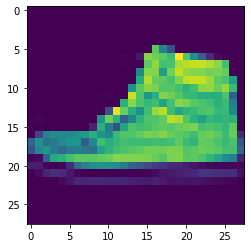

Record=5.  True label=5: Sandal.  Predicted label=8: Bag.


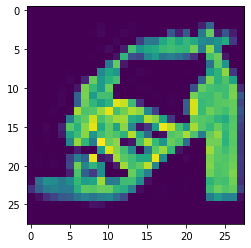

Record=7.  True label=4: Coat.  Predicted label=2: Pullover.


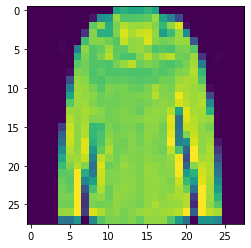

Record=10.  True label=4: Coat.  Predicted label=6: Shirt.


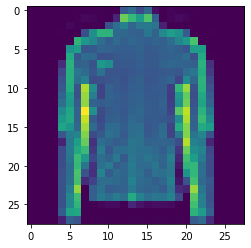

Record=20.  True label=4: Coat.  Predicted label=2: Pullover.


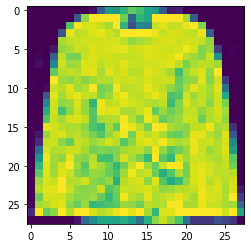

Record=21.  True label=5: Sandal.  Predicted label=7: Sneaker.


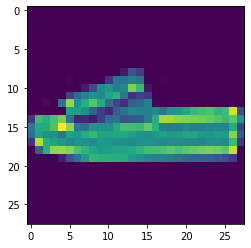

Record=33.  True label=8: Bag.  Predicted label=2: Pullover.


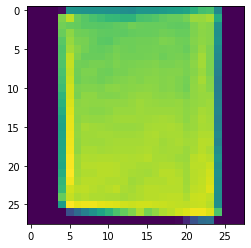

Record=34.  True label=7: Sneaker.  Predicted label=9: Ankle boot.


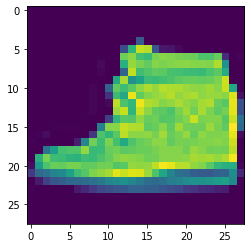

Record=37.  True label=5: Sandal.  Predicted label=7: Sneaker.


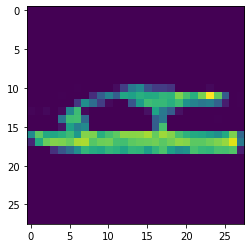

Record=38.  True label=3: Dress.  Predicted label=6: Shirt.


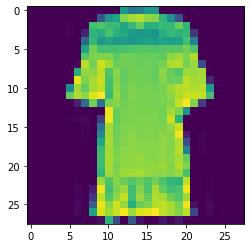

Record=41.  True label=6: Shirt.  Predicted label=0: T-shirt/top.


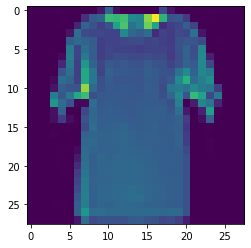

In [23]:
# Show some of the test records that are mis-classified.
num_shown = 0
for i in range(num_test):
    if(y_pred[i] != y_test.iloc[i]):
        my_pred_label = y_pred[i]
        my_true_label  = y_test.iloc[i]
        my_pixels = test_pdf.iloc[i,1:]
        caption = "Record=" + str(i) + \
            ".  True label=" +      str(my_true_label) + ": " + label_names[my_true_label] + \
            ".  Predicted label=" + str(my_pred_label) + ": " + label_names[my_pred_label] + \
            "."
        show_image(caption,my_pixels)
        
        num_shown = num_shown + 1
        if num_shown > 10:  # Show only the first 10 mis-classified
            break

***
# Section: 6 - Deployment
- Deployment can mean many things, from producing a report to deploying the solution to a production environment.
***

In [13]:
# Skip for now.

***
# Section: Conclusions
- What did you learn from this exercise?
***

In [14]:
# Fill this in.